# Путинцев Данил P3307 Вариант четный. Метод k-ближайших соседей. Лабораторная работа №4

In [31]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./WineDataset.csv")

Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

In [32]:
if not df.isna().any().any():
    print("В данных нет пустых значений.")
else:
    df.dropna(inplace=True)
    print("Пустые значения был удалены.")

В данных нет пустых значений.


Категориальных признаков нет

In [33]:
# Разделение на признаки и целевую переменную
X = df.drop('Wine', axis=1)
y = df['Wine']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.


Статистика по столбцу Alcohol
Количество: 178
Максимальное значение: 14.83
Среднее значение: 13.000617977528083
Минимальное значение: 11.03
Стандартное отклонение: ±0.8118265380058577
25% квантиль: 12.36
50% квантиль (медиана): 13.05
75% квантиль: 13.68

Статистика по столбцу Malic Acid
Количество: 178
Максимальное значение: 5.8
Среднее значение: 2.336348314606741
Минимальное значение: 0.74
Стандартное отклонение: ±1.1171460976144627
25% квантиль: 1.6
50% квантиль (медиана): 1.87
75% квантиль: 3.1

Статистика по столбцу Ash
Количество: 178
Максимальное значение: 3.23
Среднее значение: 2.3665168539325854
Минимальное значение: 1.36
Стандартное отклонение: ±0.2743440090608148
25% квантиль: 2.21
50% квантиль (медиана): 2.36
75% квантиль: 2.56

Статистика по столбцу Alcalinity of ash
Количество: 178
Максимальное значение: 30.0
Среднее значение: 19.49494382022472
Минимальное значение: 10.6
Стандартное отклонение: ±3.3395637671735052
25% квантиль: 17.2
50% квантиль (медиана): 19.5
75% квантил

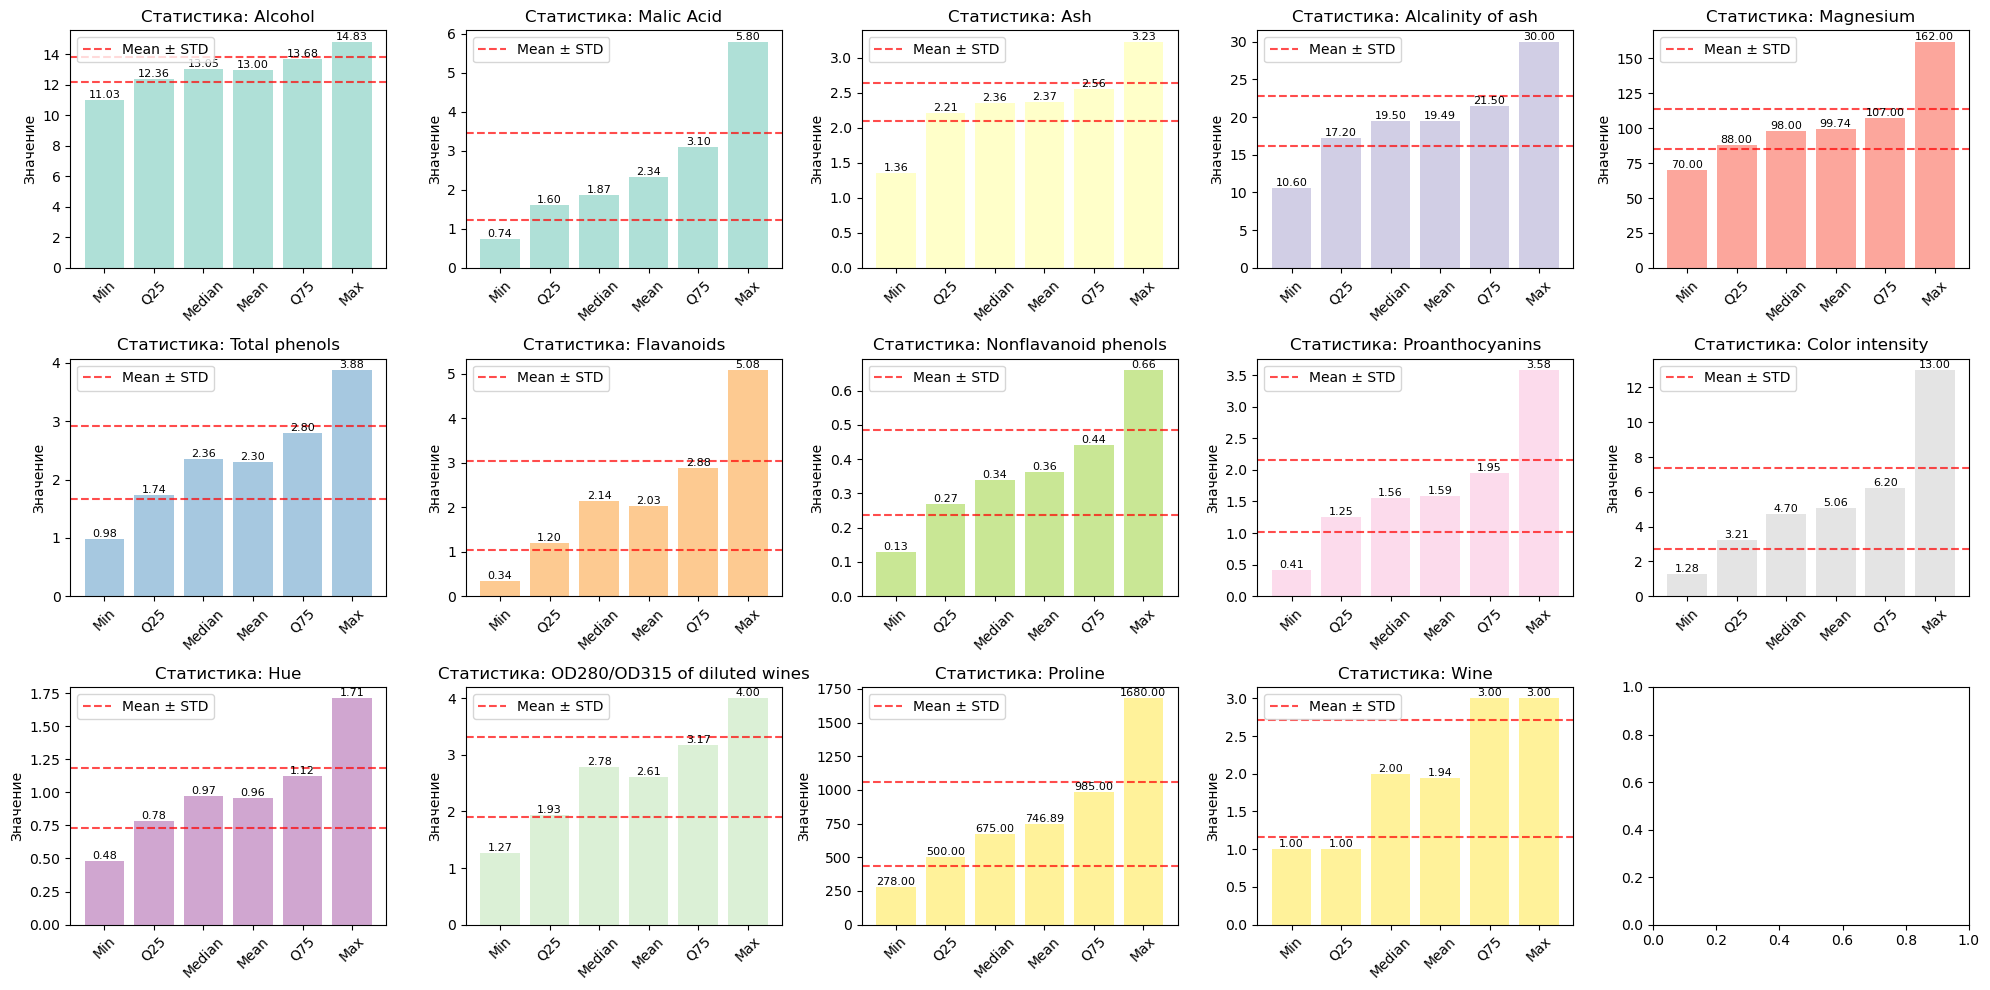

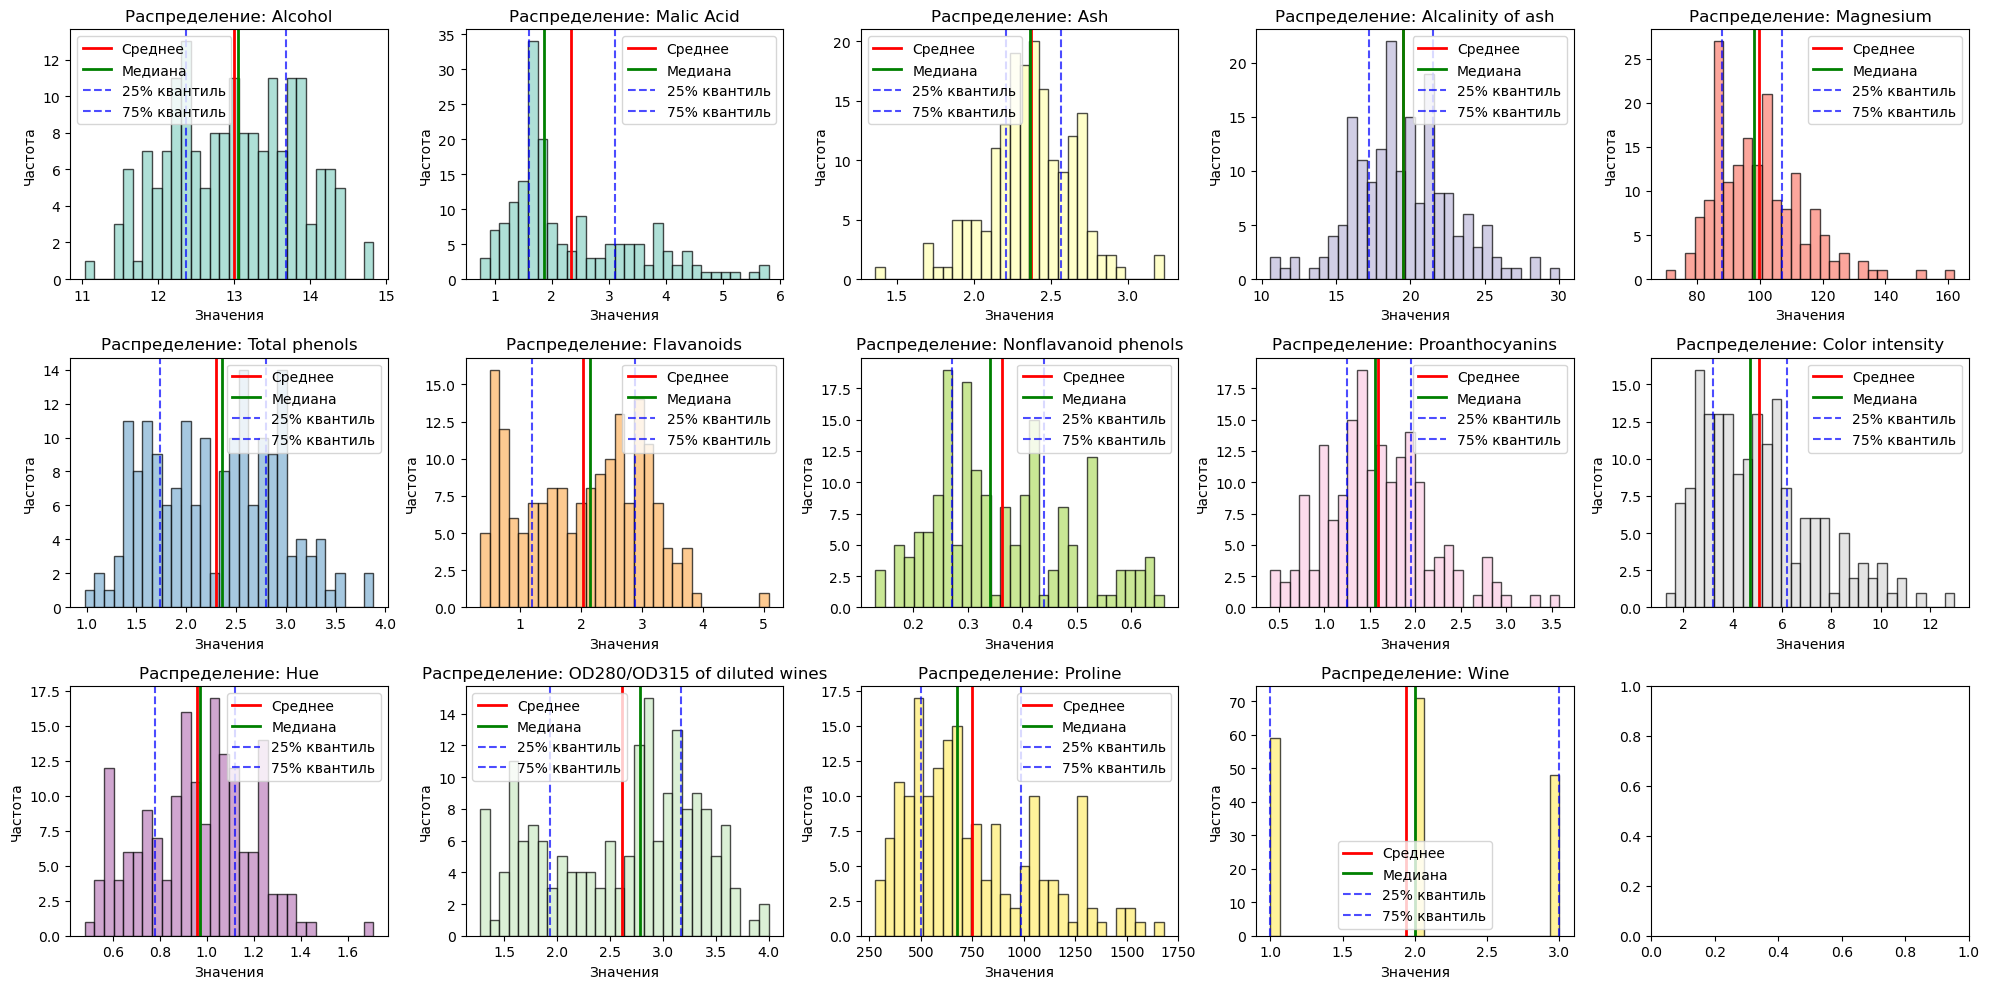

In [34]:
def get_stdev(column, mean, count):
    var = 0
    for item in column:
        var += (mean-item)**2
    var = var / (count - 1)
    return var**0.5

def get_column_stat(column, name_column):
    count = 0
    max_value = -10**20
    min_value = 10**20
    sum_value = 0
    
    for item in column:
        count += 1
        if max_value < item:
            max_value = item
        if min_value > item:
            min_value = item
        sum_value += item

    mean = sum_value / count
    stdev = get_stdev(column, mean, count)
    
    sorted_column = sorted(column)
    quantile_25 = sorted_column[int(0.25 * count)]
    quantile_50 = sorted_column[int(0.5 * count)]  
    quantile_75 = sorted_column[int(0.75 * count)]
    
    print("Статистика по столбцу", name_column)
    print("Количество:", count)
    
def get_stdev(column, mean, count):
    var = 0
    for item in column:
        var += (mean-item)**2
    var = var / (count - 1)
    return var**0.5

def get_column_stat(column, name_column):
    count = 0
    max_value = -10**20
    min_value = 10**20
    sum_value = 0
    
    for item in column:
        count += 1
        if max_value < item:
            max_value = item
        if min_value > item:
            min_value = item
        sum_value += item

    mean = sum_value / count
    stdev = get_stdev(column, mean, count)
    
    sorted_column = sorted(column)
    quantile_25 = sorted_column[int(0.25 * count)]
    quantile_50 = sorted_column[int(0.5 * count)] 
    quantile_75 = sorted_column[int(0.75 * count)]
    
    print("Статистика по столбцу", name_column)
    print("Количество:", count)
    print("Максимальное значение:", max_value)
    print("Среднее значение:", mean)
    print("Минимальное значение:", min_value)
    print("Стандартное отклонение: ±" + str(stdev))
    print("25% квантиль:", quantile_25)
    print("50% квантиль (медиана):", quantile_50)
    print("75% квантиль:", quantile_75)
    
    return {
        'count': count,
        'mean': mean,
        'std': stdev,
        'min': min_value,
        'max': max_value,
        'q25': quantile_25,
        'q50': quantile_50,
        'q75': quantile_75
    }
    print("Максимальное значение:", max_value)
    print("Среднее значение:", mean)
    print("Минимальное значение:", min_value)
    print("Стандартное отклонение: ±" + str(stdev))
    print("25% квантиль:", quantile_25)
    print("50% квантиль (медиана):", quantile_50)
    print("75% квантиль:", quantile_75)
    
    return {
        'count': count,
        'mean': mean,
        'std': stdev,
        'min': min_value,
        'max': max_value,
        'q25': quantile_25,
        'q50': quantile_50,
        'q75': quantile_75
    }

def visualize_statistics(stats_dict):
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))
    axes = axes.ravel()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(stats_dict)))
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        metrics = ['Min', 'Q25', 'Median', 'Mean', 'Q75', 'Max']
        values = [stats['min'], stats['q25'], stats['q50'], 
                 stats['mean'], stats['q75'], stats['max']]
        
        bars = axes[i].bar(metrics, values, color=colors[i], alpha=0.7)
        axes[i].set_title(f'Статистика: {col_name}')
        axes[i].set_ylabel('Значение')
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        
        axes[i].axhline(y=stats['mean'] + stats['std'], color='red', 
                       linestyle='--', alpha=0.7, label='Mean ± STD')
        axes[i].axhline(y=stats['mean'] - stats['std'], color='red', 
                       linestyle='--', alpha=0.7)
        axes[i].legend()
        
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))
    axes = axes.ravel()
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        axes[i].hist(df[col_name], bins=30, alpha=0.7, color=colors[i], 
                    edgecolor='black')
        axes[i].set_title(f'Распределение: {col_name}')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Частота')
        
        axes[i].axvline(stats['mean'], color='red', linestyle='-', 
                       linewidth=2, label='Среднее')
        axes[i].axvline(stats['q50'], color='green', linestyle='-', 
                       linewidth=2, label='Медиана')
        axes[i].axvline(stats['q25'], color='blue', linestyle='--', 
                       alpha=0.7, label='25% квантиль')
        axes[i].axvline(stats['q75'], color='blue', linestyle='--', 
                       alpha=0.7, label='75% квантиль')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

def get_stat():
    dictionary = {
        "Alcohol": df["Alcohol"],
        "Malic Acid": df["Malic Acid"],
        "Ash": df["Ash"],
        "Alcalinity of ash": df["Alcalinity of ash"],
        "Magnesium": df["Magnesium"],
        "Total phenols": df["Total phenols"],
        "Flavanoids": df["Flavanoids"],
        "Nonflavanoid phenols": df["Nonflavanoid phenols"],
        "Proanthocyanins": df["Proanthocyanins"],
        "Color intensity": df["Color intensity"],
        "Hue": df["Hue"],
        "OD280/OD315 of diluted wines": df["OD280/OD315 of diluted wines"],
        "Proline": df["Proline"],
        "Wine": df["Wine"],
    }
    
    stats_dict = {}
    
    for key, value in dictionary.items():
        print("=" * 50)
        stats_dict[key] = get_column_stat(value, key)
        print("=" * 50)
        print()
    
    visualize_statistics(stats_dict)

get_stat()

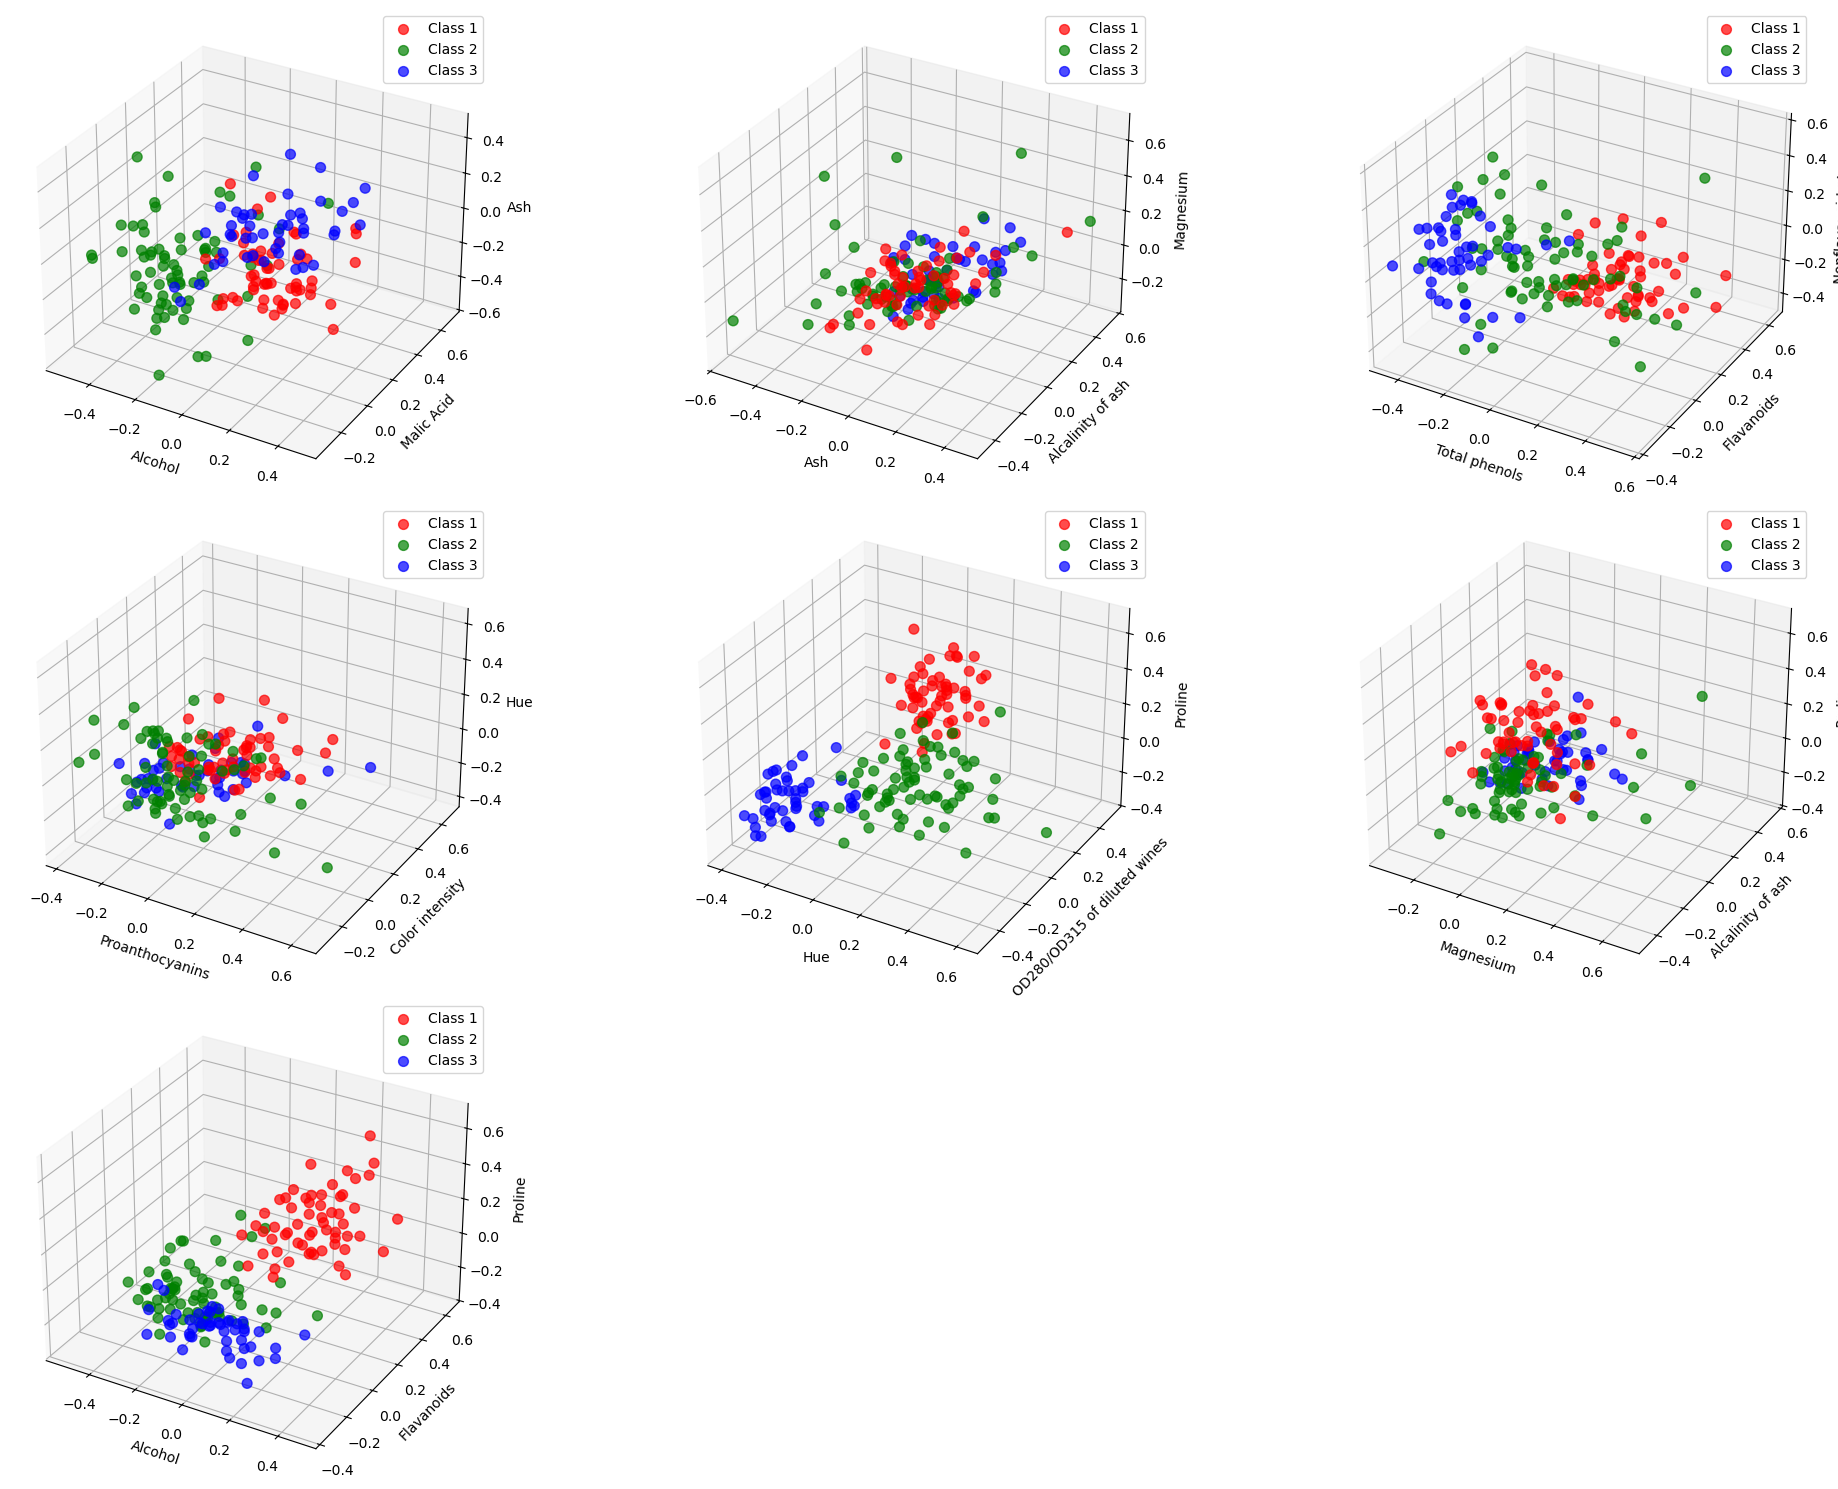

In [50]:
from mpl_toolkits.mplot3d import Axes3D

X = df.drop(columns=["Wine"])
y = df["Wine"]

X = (X - X.mean()) / (X.max() - X.min())

feature_groups = {
    "Основные химические компоненты": ["Alcohol", "Malic Acid", "Ash"],
    "Зольные компоненты": ["Ash", "Alcalinity of ash", "Magnesium"],
    "Фенольные соединения": ["Total phenols", "Flavanoids", "Nonflavanoid phenols"],
    "Проантоцианидины и цвет": ["Proanthocyanins", "Color intensity", "Hue"],
    "Оптические свойства": ["Hue", "OD280/OD315 of diluted wines", "Proline"],
    "Минеральный состав": ["Magnesium", "Alcalinity of ash", "Proline"],
    "Комплексный анализ": ["Alcohol", "Flavanoids", "Proline"]
}

colors = {1: "red", 2: "green", 3: "blue"}

fig = plt.figure(figsize=(20, 15))

for idx, (group_name, features) in enumerate(feature_groups.items(), 1):
    ax = fig.add_subplot(3, 3, idx, projection='3d')
    
    data = X[features].join(y)
    
    for wine_class in [1, 2, 3]:
        values = data.loc[data["Wine"] == wine_class]
        ax.scatter(values[features[0]], 
                  values[features[1]], 
                  values[features[2]], 
                  color=colors[wine_class], 
                  label=f'Class {wine_class}',
                  alpha=0.7,
                  s=50)
    
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.legend()

plt.tight_layout()
plt.show()


Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

In [51]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# X:               признаки
# y:               метки классов
# query_point:     точка для которой выполняется классификация
# k:               количество ближайших соседей, которые будут учтены
def k_nearest_neighbors(X, y, query_point, k):
    # Вычисляем расстояние между точками в многомерном пространстве
    distances = [euclidean_distance(query_point, x) for x in X]

    # Получаем точки с наименьшими расстояниями
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    # Берем самые часто встречающиеся
    most_common = np.bincount(k_nearest_labels).argmax()

    return most_common

Постройте две модели k-NN с различными наборами признаков:

- Модель 1: Признаки случайно отбираются.
- Модель 2: Фиксированный набор признаков, который выбирается заранее.

In [54]:
from sklearn.model_selection import train_test_split
np.random.seed(345) # seed для генератора случайных чисел, для обеспечения воспроизводимости результатов.

# Функция для получения матриц ошибок
def get_confusion_matrices(k_values, X_model, y):
  confusion_matrices_model = []
  X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42)
# Для каждой точки в тестовом наборе выполняется классификация
  for k in k_values:
    y_pred_model = [k_nearest_neighbors(X_train.values, y_train.values, x, k) for x in X_test.values]
    confusion_matrix = np.zeros((3, 3), dtype=int)
# Строится матрица ошибок, которая считает, сколько точек было правильно и неправильно классифицировано для каждого класса
    for i in range(len(y_test)):
        confusion_matrix[y_test.iloc[i] - 1][y_pred_model[i] - 1] += 1
        confusion_matrices_model.append(confusion_matrix)

  return confusion_matrices_model

Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

In [56]:
k_values = [3, 5, 10]

# Модель 1
random_feature_indices = np.random.choice(X.shape[1], size=3, replace=False)
X_model1 = X.iloc[:, random_feature_indices]

# Модель 2
fixed_feature_indices = [0, 1, 5]
X_model2 = X.iloc[:, fixed_feature_indices]
# Выбираются случайные признаков из матрицы признаков X.
confusion_matrices_model1 = get_confusion_matrices(k_values, X_model1, y)
# Фиксированный набор признаков
confusion_matrices_model2 = get_confusion_matrices(k_values, X_model2, y)

# Вывод матриц ошибок
for k, confusion_matrix in zip(k_values, confusion_matrices_model1):
    print(f"Матрицы ошибок для Модели 1 с k={k}:\n", confusion_matrix)

print("\n---------------------------------\n")

for k, confusion_matrix in zip(k_values, confusion_matrices_model2):
    print(f"Матрицы ошибок для Модели 2 с k={k}:\n", confusion_matrix)

Матрицы ошибок для Модели 1 с k=3:
 [[13  1  0]
 [ 3  9  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 1 с k=5:
 [[13  1  0]
 [ 3  9  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 1 с k=10:
 [[13  1  0]
 [ 3  9  2]
 [ 0  0  8]]

---------------------------------

Матрицы ошибок для Модели 2 с k=3:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=5:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=10:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
